In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
tf.__version__

'2.3.0'

In [3]:
data = pd.read_csv("/home/mfatihpolat/Devjobs/Python/mnist_digit/dataset/digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = data['label']
features = data.drop(columns=['label'])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, label)

In [9]:
print("Data Info")
print("\n")
print("=" * 50)

print(f"Training features shape: {x_train.shape}")
print("\n")
print(f"Test features shape: {x_test.shape}")
print("\n")

print("=" * 50)
print(f"Training label shape: {y_train.shape}")
print("\n")
print(f"Test label shape: {y_test.shape}")
print("\n")

Data Info


Training features shape: (31500, 784)


Test features shape: (10500, 784)


Training label shape: (31500,)


Test label shape: (10500,)




## Model Building

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(1, 784)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1, 128)            100480    
_________________________________________________________________
dense_7 (Dense)              (None, 1, 128)            16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1, 10)             1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=25, validation_split=0.3)

Epoch 1/25
690/690 [==============================] - 2s 2ms/step - loss: 8.6682 - accuracy: 0.8251 - val_loss: 1.0911 - val_accuracy: 0.8892
Epoch 2/25
690/690 [==============================] - 1s 2ms/step - loss: 0.7748 - accuracy: 0.9121 - val_loss: 0.7927 - val_accuracy: 0.9096
Epoch 3/25
690/690 [==============================] - 2s 4ms/step - loss: 0.5284 - accuracy: 0.9282 - val_loss: 0.7702 - val_accuracy: 0.9044
Epoch 4/25
690/690 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.9382 - val_loss: 0.6935 - val_accuracy: 0.9152
Epoch 5/25
690/690 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.9411 - val_loss: 0.6748 - val_accuracy: 0.9228
Epoch 6/25
690/690 [==============================] - 1s 2ms/step - loss: 0.3743 - accuracy: 0.9433 - val_loss: 0.4840 - val_accuracy: 0.9310
Epoch 7/25
690/690 [==============================] - 1s 2ms/step - loss: 0.2923 - accuracy: 0.9481 - val_loss: 0.4435 - val_accuracy: 0.9327
Epoch 

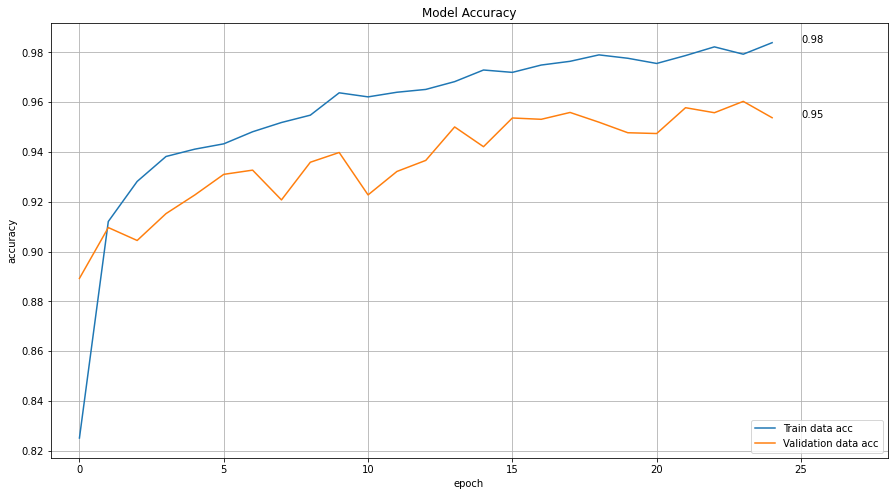

In [37]:
plt.figure(figsize=(15,8))

plt.plot(hist.history['accuracy'])
plt.text(25, hist.history['accuracy'][-1], str(round(hist.history['accuracy'][-1], 2)))

plt.plot(hist.history['val_accuracy'])
plt.text(25, hist.history['val_accuracy'][-1], str(round(hist.history['val_accuracy'][-1], 2)))

plt.title("Model Accuracy")
plt.legend(['Train data acc', 'Validation data acc'], loc='lower right')
plt.xlim((-1, 28))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.show()